# Advanced Python: Regressions


### Irises and linear regression

<center>
<img src="./pictures/irises_vg.jpg" style="width:372px;height:284px;">
<br>
<i>Irises (1889, Vincent van Gogh)</i>
</center>

Regression (known otherwise as line/curve-fitting) is a powerful and one of the easiest tools you can apply to your dataset. The general goal of regression is to find some appropiate function $f$ that predicts the value of one or more continuous variables $y$ given the value of some $k$-dimensional input variables vector $x$. The simplest form of $f$ is a linear function, which is the focus of this notebook.

Some other useful packages to practice: `pandas`, `seaborn`

Reference:
1. [Linear Regression using Iris Dataset — 'Hello, World!' of Machine Learning](https://medium.com/analytics-vidhya/linear-regression-using-iris-dataset-hello-world-of-machine-learning-b0feecac9cc1)
2. Pattern Recognition and Machine Learning, Chapter 4: Linear Models for Regression (Bishop, 2006)
3. [The Iris Dataset](https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html)

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# import dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()

# create a dataframe using pandas
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
species_names = iris.target_names

### Warmup exercises:
1. What features of the irises are included in the dataset? How do you find out?
   1. What are the mean, min, median, max and quantiles of the features? `pandas` has a built-in method to take care of all these.
2. What is in the "species" column? 
   > *Hint*: you can find out the answer by calling .unique() on the "species" column of the DataFrame. 

   > *Hint*: The numbers in the "species" column are actually the indices of the species in the `species_names` array.
   1. Substitue the species column with actual species names.
3. What's the sepal length of the 10th sample in the dataset?
4. What's the largest sepal width in the dataset? Which sample does it belong to?

In [42]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [28]:
print("Features in the dataset: ", ", ".join(iris_df.columns))
print("Unique values in the 'species' column: ", iris_df['species'].unique())
print(f"Sepal length of the 10th sample: {iris_df.iloc[10]['sepal length (cm)']} cm")
print(f"Largest sepal width: {iris_df['sepal width (cm)'].max()} cm, from sample {iris_df['sepal width (cm)'].idxmax()}")


Features in the dataset:  sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), species
Unique values in the 'species' column:  [0 1 2]
Sepal length of the 10th sample: 5.4 cm
Largest sepal width: 4.4 cm, from sample 15


In [ ]:
# A crazy way: lambda functions
# substitue species column with actual species names
iris_df['species'] = iris_df['species'].apply(lambda x: species_names[x])

# alternatively, you can write a for loop and use the following function:
def get_species_name(species_index, species_name):
    """Get the species name from the species index."""
    return species_names[species_index]

### Exercises 1:
1. Recreate the following visualization:
<center>
<img src="./pictures/sepalLength_sepalWidth.png" style="width:500px;height:400px;">
<br>
<i>Fig 1: Sepal Length vs Sepal Width</i>
</center>

> *Hint*: Use `plt.scatter` (or seaborn's `scatterplot`). Doesn't really matter what colors you use, but show the distribution of Sepal length vs. sepal width and add an appropriate legend.

Text(0, 0.5, 'sepal width (cm)')

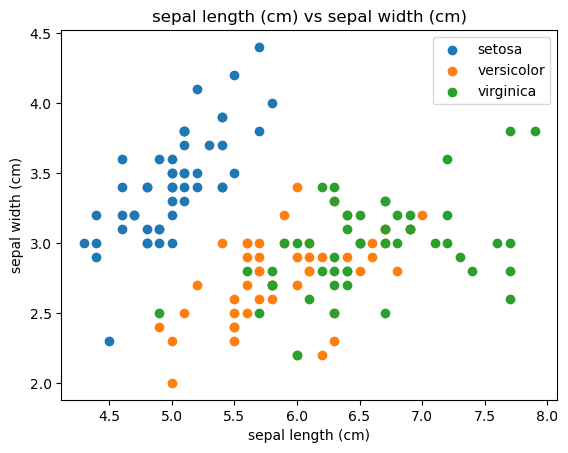

In [53]:
plt.figure()

# features I want on the x, y axes
x_feature = 'sepal length (cm)'
y_feature = 'sepal width (cm)'

for name in iris_df['species'].unique(): # loop over each species
    plt.scatter(iris_df[iris_df['species'] == name][x_feature], 
                iris_df[iris_df['species'] == name][y_feature], 
                label=name) # index the data by species

plt.legend()
plt.title(f'{x_feature} vs {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)

### Exercises 2:
Using `sns.pairplot` (`sns` == `seaborn`), you can visualize the pairwise relationships in the dataset. Call `pairplot` on the iris dataset and use `species` as `hue`.

1. Are all the plots useful? Are there any redundant plots?
2. Suppose we want to **predict** the value of one feature based on another. Which pairs of features would you choose and why?

In [54]:
import seaborn as sns

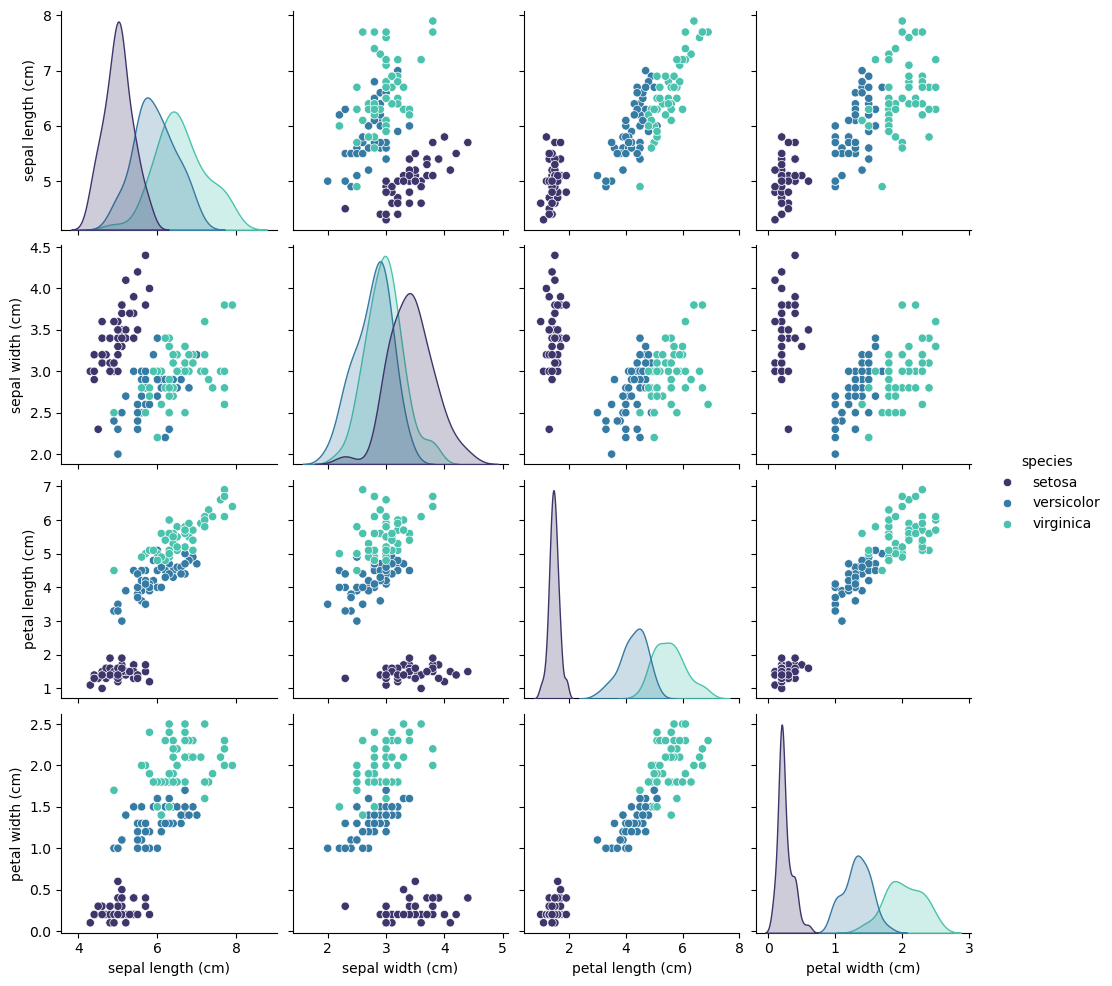

In [58]:
# choose a color palette that you like/is suitable
sns.pairplot(iris_df, hue='species', palette="mako")

### Exercises 3: Linear regression
Of course, we can use regression/a linear function predict the value of one feature based on another (it's just sometimes the predictions doesn't work very well/make sense--e.g. predicting shark attack at beaches based on ice cream sales). Here, we will use "petal length" to predict "petal width".

> We can use linear regression to predict values; conversely, we can also prove/show that two features are correlated by showing linear regression works well on them.

1. `sklearn` (i.e. `scikit-learn`) has a built-in linear regression model. Use it to predict the petal width based on the petal length.
2. What's the coefficient and intercept of the linear function?
3. Plot the predicted values against the actual values. Does the linear function fit well?
4. What's a quantitative measure of how well the linear function fits? **Actually, how did we get this line in the first place?**

In [63]:
from sklearn.linear_model import LinearRegression

In [65]:
# get X: independent variable
X = iris_df["petal length (cm)"].values.reshape(-1, 1)
# get y: dependent variable (feature to predict)
y = iris_df["petal width (cm)"].values.reshape(-1, 1)

# initialize a model
reg = LinearRegression()
reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
def lin_func(coef, intercept, x):
    """Linear function."""
    return coef * x + intercept

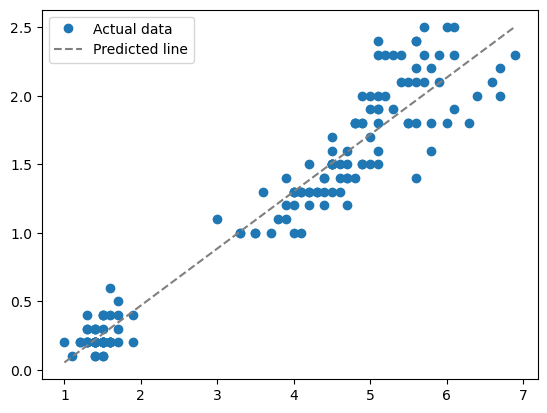

In [73]:
coef = reg.coef_[0][0]
intercept = reg.intercept_[0]

plt.plot(X, y, 'o', label='Actual data')

x_min, xmax = X.min(), X.max()
x_line = np.linspace(x_min, xmax, 2)
plt.plot(x_line, lin_func(coef, intercept, x_line), '--', color="gray", label='Predicted line')

plt.legend()

In [78]:
print("R^2 of the our linear regressor: ", reg.score(X, y))  
# returns the coefficient of determination R^2 of the prediction

R^2 of the our linear regressor:  0.9271098389904927


### How can regressions be used in neuroscience/psychology?